In [12]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import sklearn as skl
import config
from sqlalchemy import create_engine

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
#set up SQL connection

protocol = 'postgresql'
username = config.username
password = config.password
host = 'localhost'
port = 5432
database_name = config.database_name
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)
con = engine.connect()

In [4]:
#read in cleaned X table from SQL

cleaned_placeholder_df = pd.read_sql('Select * from "X"',con)
cleaned_placeholder_df.head()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Rating Agency Name_Standard & Poor's Ratings Services,Sector_Basic Industries,Sector_Capital Goods,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Health Care,Sector_Other,Sector_Public Utilities,Sector_Technology
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,0,0,0,0,0,0,0,1,0,0
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,0,0,0,0,0,0,0,1,0,0
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,0,0,0,0,0,0,0,1,0,0
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,0,0,0,0,0,0,0,1,0,0
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,1,0,0,0,0,0,0,1,0,0


In [5]:
#read in cleaned Y table from SQL alternate_y.csv.
cleaned_y_df = pd.read_sql("Select * from alternate_y",con)
cleaned_y_df.head()

,Rating
0,1
1,0
2,0
3,0
4,0


In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cleaned_placeholder_df)

In [10]:
tsne = TSNE(learning_rate=900)
tsne_features = tsne.fit_transform(scaled_features)

C:\Users\Liam\.conda\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


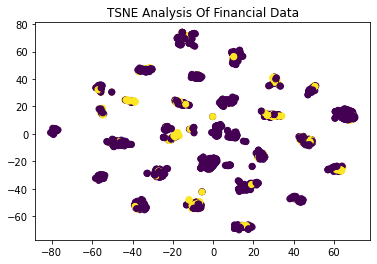

In [16]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c = cleaned_y_df['Rating'])
plt.title('TSNE Analysis Of Financial Data')
plt.savefig('plots/TSNE Analysis.png')
plt.show()
